In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Parameters, minimize

In [2]:
def deriv(t, y, params, initial_states):
    S, I, R = y[0], y[1], y[2]
    N = S + I + R
    dSdt = -params['beta'] * S * I / N
    dIdt = params['beta'] * S * I / N - params['gamma'] * I
    dRdt = params['gamma'] * I
    
    return dSdt, dIdt, dRdt

def run_model(params, initial_states):
    sol = solve_ivp(deriv, t, list(initial_states.values()), t_eval = t_eval, args=(params, initial_states))
    out = sol.y.T
    
    df = pd.DataFrame(dict(zip(['S', 'I', 'R'], out.T)))
    
    return df

def init_fit_parameters(beta):
    params_obj = Parameters()
    
    params_obj.add(beta, value = beta, min = 0, max = 1)
    
    return params_obj

def fit_run_model(params_fit):
    param_keys = [i for i in params_fit if i in list(params.keys())]
    init_keys = [i for i in params_fit if i in list(initial_states.keys())]
    
    for k in param_keys:
        params[k] = params_fit[k]
    for j in init_keys:
        initial_states[j] = params_fit[j]
        
    return run_model(params, initial_states)

def fit_objective():
    data = np.empty(shape=0)
    mod_out = np.empty(shape=0)
    
    fit_run_model(params_fit)

def fit_constants(params_fit):
    fit_out = minimize(fit_objective, init_fit_parameters(), method = 'nelder')

In [3]:
t = (0, 160)
t_eval = np.linspace(0, 160, 160)

params = {'beta': 0.2, 'gamma': 1./10}
initial_states = {'S': 999, 'I': 1, 'R': 0}

In [4]:
out = run_model(params, initial_states)

In [8]:
fit_data = pd.read_csv('data/dengue_sim_data.csv')

/var/folders/rp/8jlzkncj6vl5m3tbtxz3rwk4000z_s/T/ipykernel_47311/4188922946.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


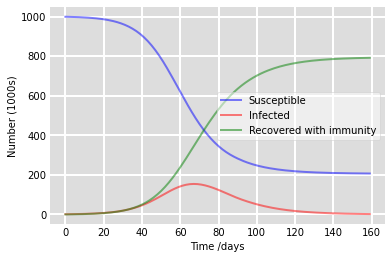

In [5]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(list(range(len(list(out['S'])))), list(out['S']), 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(list(range(len(list(out['I'])))), list(out['I']), 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(list(range(len(list(out['R'])))), list(out['R']), 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

/var/folders/rp/8jlzkncj6vl5m3tbtxz3rwk4000z_s/T/ipykernel_35062/2112217671.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


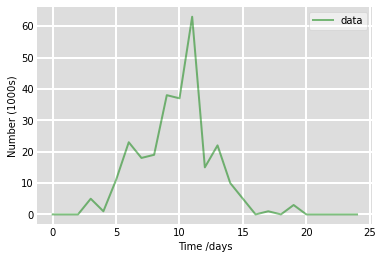

In [68]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(list(range(len(data))), data, 'g', alpha=0.5, lw=2, label='data')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()